# Homework 4 - Genetic Networks #

## Negative Feedback Loop - Stress Response ##

Consider Stress molecules (S) that are controlled by Enzymes (E) which are controlled by Repressors (R). The concentrations of these components are regulated by the following equations:

$$ \frac{dR}{dt} = \frac{\gamma}{1+(\frac{R}{k})^h} - \frac{R}{\tau_R} + l $$
$$ \frac{dS}{dt} = \Theta_t - \gamma E S $$
$$ \frac{dE}{dt} = \frac{1}{1+(\frac{R}{k})^h} - \frac{E}{\tau_E} $$

Initial conditions: $ S(0) = E(0) = 0, R(0) = 0 $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

2000
20


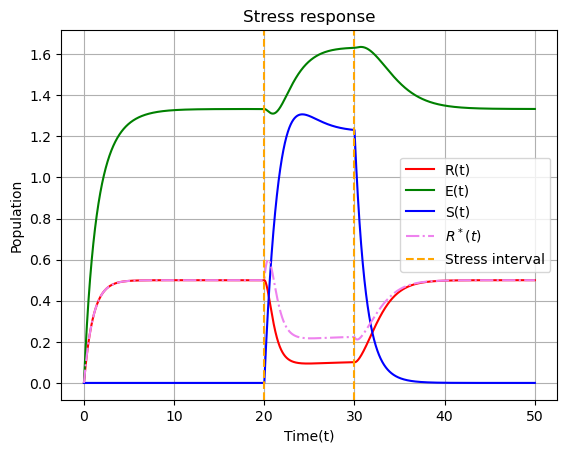

In [2]:
# initial conditions
R0 = 0
S0 = 0
E0 = 0

par = [0.5,1,1,0,1,2,[20,30]]

# we define Theta_t(t), which is the stress source, to be a step function that activates and spikes at a certain 
# point in time. This makes sense since the stress is usually caused by an abrupt change or signal

def Theta_t(t):
    #return np.where(np.isclose(t,t_th,rtol=1e-4), 1, 0)
    return np.where(t>0,1,0)

# define the equations
def system(y, t, Theta_t, par):
    # par[0] = gamma
    # par[1] = k
    # par[2] = h
    # par[3] = l
    # par[4] = tau_R
    # par[5] = tau_E
    # par [6] = t_th (t_s: stress point)
    
    R, E, S = y
    R_star = R * (1+S)
    drdt = par[0] / (1 + (S/par[1])**par[2]) - (R_star/par[4]) + par[3]
    dedt = 1 / (1+(R_star/par[1])**par[2]) - (E / par[5])
    dsdt = Theta_t(t-par[6][0])*(1-Theta_t(t-par[6][1])) - par[0] * E * S   
    return [drdt,dedt,dsdt]

# set the time space
t_s = np.linspace(0,50,5000)

print(np.sum(Theta_t(t_s-par[6][0])*(1-Theta_t(t_s-par[6][1]-10))))
print(par[6][0])

# Solve 
R= odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,0]
E = odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,1]
S = odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,2]
plt.plot(t_s, R, c='r', label='R(t)')
plt.plot(t_s, E, c='g', label='E(t)')
plt.plot(t_s, S,  c='b', label='S(t)')
plt.plot(t_s, R*(1+S), c='violet', linestyle='-.', label='$R^*(t)$')
plt.axvline(par[6][0], c='orange', linestyle='--', label='Stress interval')
plt.axvline(par[6][1], c='orange', linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Time(t)')
plt.ylabel('Population')
plt.title('Stress response')
plt.show()


## Genetic Network - Combining Positive and Negative Feedback Loops ##

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1220887836990D-05   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1220887836990D-05   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1220887836990D-05   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1220887836990D-05   r2 =                  NaN


/tmp/ipykernel_107382/755866036.py:28: RuntimeWarning: invalid value encountered in scalar divide
  dsdt = sigma*(T/(T+1)) - gamma_S*S*(E/E+1)
/tmp/ipykernel_107382/755866036.py:37: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  R= odeint(network, [R0,E0,T0,S0], t_s, args=(par,))[:,0]
/tmp/ipykernel_107382/755866036.py:38: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  S = odeint(network, [R0,E0,T0,S0], t_s, args=(par,))[:,1]
/tmp/ipykernel_107382/755866036.py:39: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  T = odeint(network, [R0,E0,T0,S0], t_s, args=(par,))[:,2]
/tmp/ipykernel_107382/755866036.py:40: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  E = odeint(network, [R0,E0,T

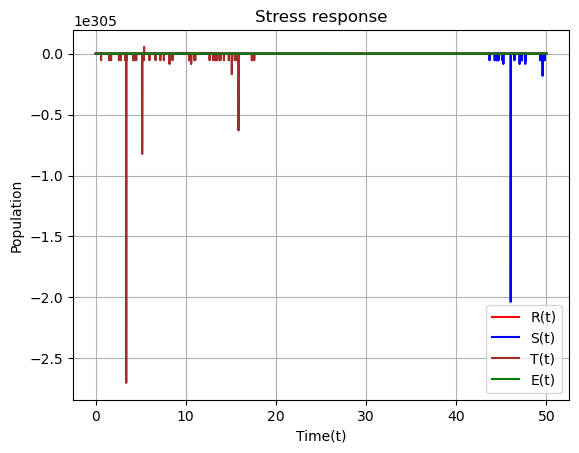

In [3]:
# initial conditions
R0 = 0
S0 = 0
T0 = 0
E0 = 0


par = [0.8, # gamma_S
       1,   # k
       1,   # h
       0.4, # sigma
       1,   # tau_R
       2,   # tau_T
       1,   # tau_E
       0,   # l_R
       0,   # l_T
       0,   # l_E
       0.8] # gamma_R

# par[0] = gamma_S
# par[1] = k
# par[2] = h
# par[3] = sigma
# par[4] = tau_R
# par[5] = tau_T
# par[6] = tau_E
# par[7] = l_R
# par[8] = l_T
# par[9] = l_E
# par[10] = gamma_R


def network(y, t, par):
    gamma_S, k, h, sigma, tau_R, tau_T, tau_E, l_R, l_T, l_E , gamma_R= par
    
    R, S, T, E = y
    R_monod = R*S / (1 + S)
    drdt = gamma_R /(1+(R/k)**h) - R / tau_R + l_R
    dsdt = sigma*(T/(T+1)) - gamma_S*S*(E/E+1)
    dtdt = - tau_T * T + 1 / (1 + (R_monod/k)**h) + l_T
    dedt = -tau_E * E + 1/(1+(R_monod/k)**h) + l_E
    return [drdt, dsdt, dtdt, dedt]

# set the time space
t_s = np.linspace(0,50,5000)

# Solve 
R= odeint(network, [R0,E0,T0,S0], t_s, args=(par,))[:,0]
S = odeint(network, [R0,E0,T0,S0], t_s, args=(par,))[:,1]
T = odeint(network, [R0,E0,T0,S0], t_s, args=(par,))[:,2]
E = odeint(network, [R0,E0,T0,S0], t_s, args=(par,))[:,3]
plt.plot(t_s, R, c='r', label='R(t)')
plt.plot(t_s, S,  c='b', label='S(t)')
plt.plot(t_s, T, c='brown', label='T(t)')
plt.plot(t_s, E,  c='g', label='E(t)')
plt.legend()
plt.grid()
plt.xlabel('Time(t)')
plt.ylabel('Population')
plt.title('Stress response')
plt.show()